# Programming and Scripting-Project

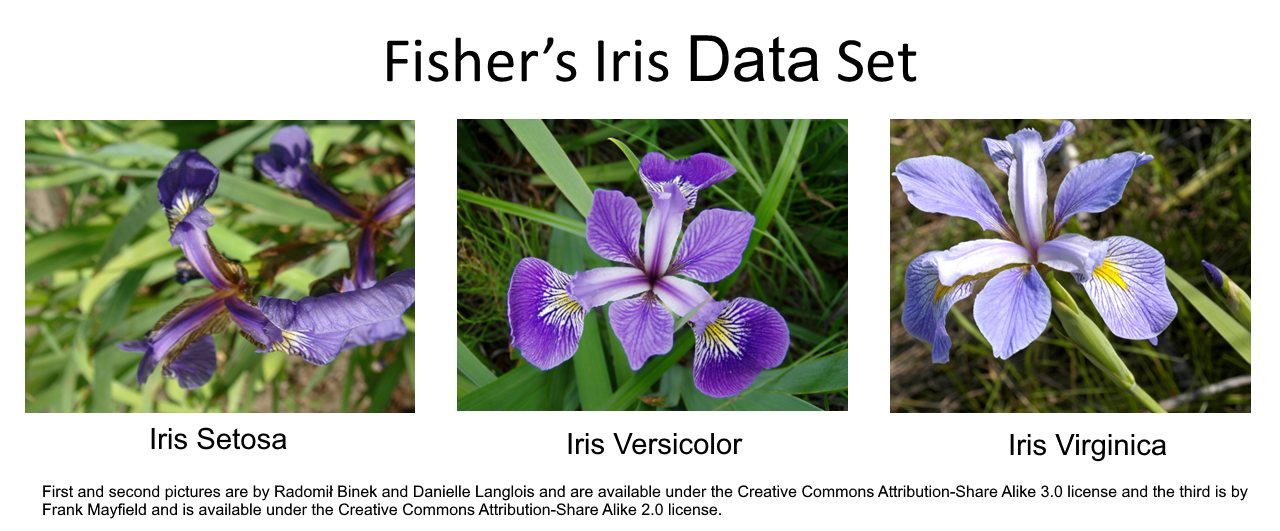

## Introduction

Fisher’s Iris Data Set is based on data collected by Edgar Anderson from three species of irises in the Gaspé Peninsula in Quebec, Canada. This Data set has been used countless times in statistics papers since they were first used by R. A. Fisher in 1936 to introduce the method of discriminant analysis. The dataset is made up of five variables, the first four of which are measurements of Sepal Length, Sepal Width, Petal Length and Petal Width, and a fifth variable which denotes which species of iris, Iris Setosa,Iris Versicolour, and Iris Virginca(Fox and Weisberg, 2011). There are 50 samples for each species for a total of 150 samples. Fishers aim was to classify the species based on the different measurements in the dataset and since the advent of machine learning this dataset has become a benchmark for testing algorithms.

### Sepals

In most flowering plants sepals are usually the green leaf like structures that enclose the flower in the bud and open up to support the petals when it blooms. While Botanists disagree as to whether Irises have Sepals or not(‘What-should-we-know-about-the-famous-Iris-data.pdf’, 2013), for the purposes of this project, we will, as Anderson and Fisher have done, count the larger petal-like parts of the flower as sepals.

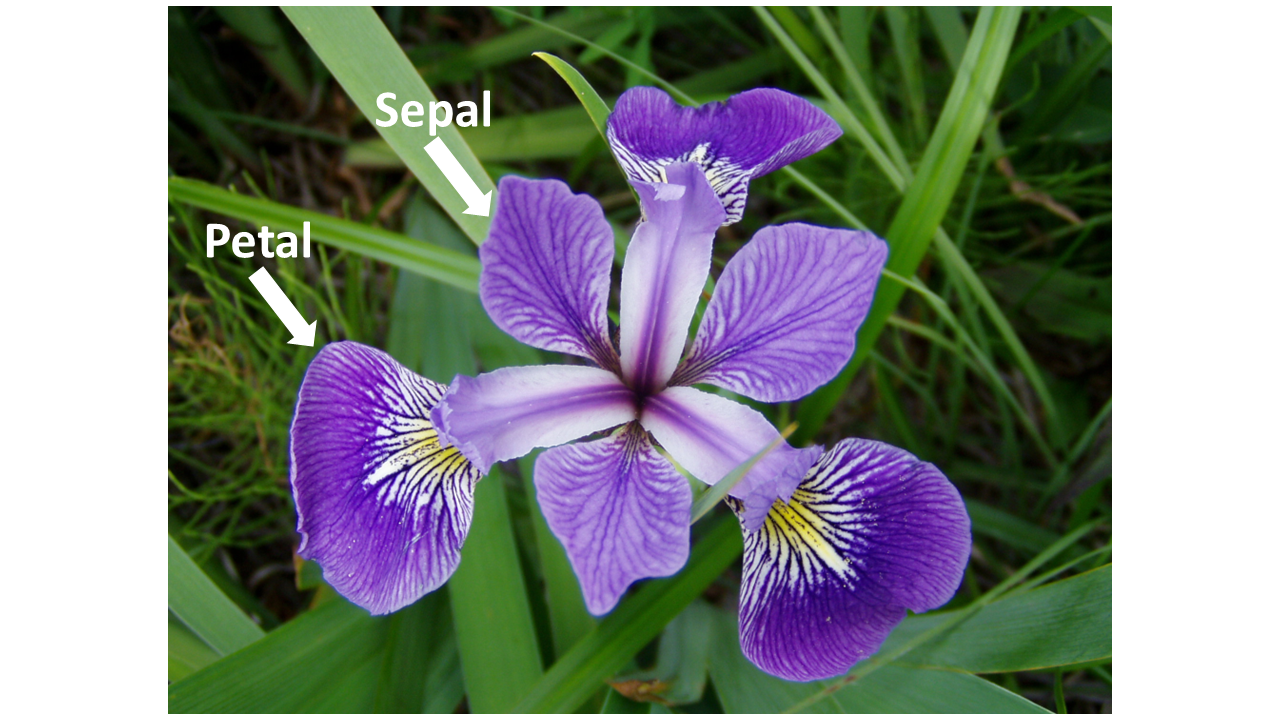

### Downloading and saving the dataset

The code below shows 3 ways of getting the code 
1. Import from a manually downloaded and saved locally CSV file.
2. Download using an APi from https://scikit-learn.org/
3. scrapping from the Iris Dataset wikipedia page at https://en.wikipedia.org/wiki/Iris_flower_data_set
These 3 datasets will be then saved to an Excel file.

In [18]:
# load_iris_data.py
# Author: Declan Fox
# Test writing all 3 datasets to 1 xl file


import csv
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import requests
from bs4 import BeautifulSoup as bs

# import from CSV file
FILENAME="iris_data.csv"
with open(FILENAME, "rt") as file:
    csvReader = csv.reader(file, delimiter = ',') 

# load to Pandas Dataframe
df1 = pd.read_csv('iris_data.csv')

# Download from API
iris = load_iris()
df2= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

# Scrape from website
py_url = "https://en.wikipedia.org/wiki/Iris_flower_data_set"
py_page = requests.get (py_url)
py_soup = bs(py_page.text, 'html.parser')
py_table = py_soup.find ('table', {'class':'wikitable'})
py_rows = py_table.find_all ('tr')

df3=pd.read_html(str(py_table))
# convert list to dataframe
df3=pd.DataFrame(df3[0])

# write to Excel
with pd.ExcelWriter('iris_dataset.xlsx', engine='openpyxl') as writer: 
    df1.to_excel(writer, sheet_name='CSV',index=False)
    df2.to_excel(writer, sheet_name='API',index=False)
    df3.to_excel(writer, sheet_name='Wiki',index=False)
    

SSLError: HTTPSConnectionPool(host='en.wikipedia.org', port=443): Max retries exceeded with url: /wiki/Iris_flower_data_set (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)')))

### Text File

The following code will create a text file with information on each variable:

In [19]:
# variable_txt.py
# author Declan Fox
# tests writing variable summaries to text file.

FILENAME = "variables.txt"

Sepal_length = '''this will hold a summary of what sepal length is and the data it contains\n'''
Sepal_width = '''this will hold a summary of what sepal width is and the data it contains\n'''
Petal_length = '''this will hold a summary of what petal length is and the data it contains\n'''
Petal_width	= '''this will hold a summary of what petal width is and the data it contains\n'''
Species = '''this will hold a summary of what the species variable is and the data it contains\n'''

with open(FILENAME, 'wt') as f:
    f.write(Sepal_length)
    f.write(Sepal_width)
    f.write(Petal_length)
    f.write(Petal_width)
    f.write(Species) 

We can read at the outputed file with the following code

In [24]:
with open("variables.txt") as file:
    
    lines=file.readlines()
    for line in lines:
        print(line)

this will hold a summary of what sepal length is and the data it contains

this will hold a summary of what sepal width is and the data it contains

this will hold a summary of what petal length is and the data it contains

this will hold a summary of what petal width is and the data it contains

this will hold a summary of what the species variable is and the data it contains



### Plotting 

The following code will generate histograms of each variable which are seperated into species:

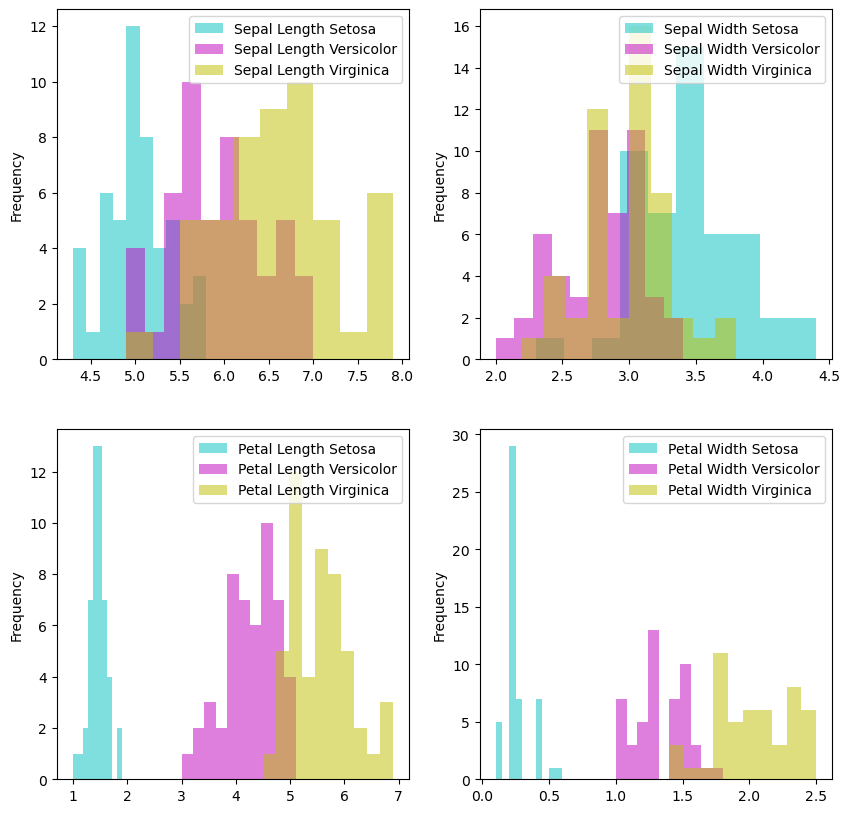

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


iris = load_iris()
 
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
 
df1 = df[0:50]
df2 = df[50:100]
df3 = df[100:150]

# plot histogram

fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(ncols=2, nrows=2,  figsize=(10, 10))

df1.plot(kind = 'hist', y = 'sepal length (cm)', color='c', alpha = 0.5, label = 'Sepal Length Setosa', ax=ax)
df2.plot(kind = 'hist', y = 'sepal length (cm)', color='m', alpha = 0.5, label = 'Sepal Length Versicolor', ax=ax)
df3.plot(kind = 'hist', y = 'sepal length (cm)', color='y', alpha = 0.5, label = 'Sepal Length Virginica', ax=ax)
df1.plot(kind = 'hist', y = 'sepal width (cm)', color='c', alpha = 0.5, label = 'Sepal Width Setosa', ax=ax1)
df2.plot(kind = 'hist', y = 'sepal width (cm)', color='m', alpha = 0.5, label = 'Sepal Width Versicolor', ax=ax1)
df3.plot(kind = 'hist', y = 'sepal width (cm)', color='y', alpha = 0.5, label = 'Sepal Width Virginica', ax=ax1)
df1.plot(kind = 'hist', y = 'petal length (cm)', color='c', alpha = 0.5, label = 'Petal Length Setosa', ax=ax2)
df2.plot(kind = 'hist', y = 'petal length (cm)', color='m', alpha = 0.5, label = 'Petal Length Versicolor', ax=ax2)
df3.plot(kind = 'hist', y = 'petal length (cm)', color='y', alpha = 0.5, label = 'Petal Length Virginica', ax=ax2)
df1.plot(kind = 'hist', y = 'petal width (cm)', color='c', alpha = 0.5, label = 'Petal Width Setosa', ax=ax3)
df2.plot(kind = 'hist', y = 'petal width (cm)', color='m', alpha = 0.5, label = 'Petal Width Versicolor', ax=ax3)
df3.plot(kind = 'hist', y = 'petal width (cm)', color='y', alpha = 0.5, label = 'Petal Width Virginica', ax=ax3)

plt.show()


These are scatter plots of both pairs of variables

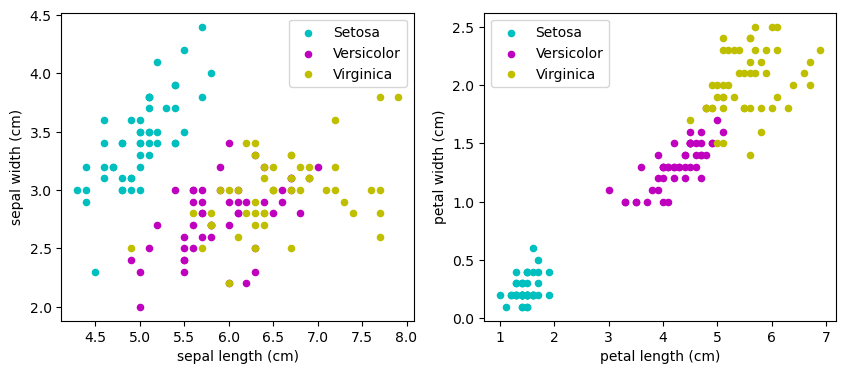

In [22]:
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

df1.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', label = 'Setosa', color='c', ax=ax)
df2.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', color='m', label = 'Versicolor', ax=ax)
df3.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', color='y', label = 'Virginica', ax=ax)
df1.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', label = 'Setosa', color='c', ax=ax1)
df2.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', color='m', label = 'Versicolor', ax=ax1)
df3.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', color='y', label = 'Virginica', ax=ax1)

plt.show()
